In [159]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [162]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
num_cities = len(cities)


In [182]:
num_cities

610

In [183]:
city_df = pd.DataFrame({
    'cities':cities
                       })
#uq = city_df.cities.unique
city_df['Lat'] = ""
city_df['Temperature'] = ""
city_df['Humidity'] = ""
city_df['Cloudiness (%)'] = ""
city_df['Wind Speed (mph)'] = ""


city_df

,cities,Lat,Temperature,Humidity,Cloudiness (%),Wind Speed (mph)
0,carutapera,,,,,
1,belushya guba,,,,,
2,hamilton,,,,,
3,saleaula,,,,,
4,shimoda,,,,,
5,wattegama,,,,,
6,salalah,,,,,
7,iqaluit,,,,,
8,ardahan,,,,,
9,rikitea,,,,,


## Perform API Calls

In [184]:
# OpenWeatherMap API Key
import json
miss_count=0
api_key = api_keys.api_key
# Starting URL for Weather Map API Call
for index,row in city_df.iterrows():
    city = row['cities']
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(url).json()
    #print(json.dumps(response,indent=4,sort_keys=True))
    print("Now retrieving city #%s: %s" % (index + 1, city_df.loc[index,"cities"]))
    print(url)
    
    try:
        city_df.loc[index,'Lat']=response['coord']['lat']
        city_df.loc[index,'Temperature']=response['main']['temp']
        city_df.loc[index,'Humidity']=response['main']['humidity']
        city_df.loc[index,'Cloudiness (%)']=response['clouds']['all']
        city_df.loc[index,'Wind Speed (mph)']=response['wind']['speed']
    except(KeyError):
        
        print("Missing details... skip.")
        miss_count += 1
        if num_cities-miss_count < 500:
            break
    
    


Now retrieving city #1: carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=carutapera
Now retrieving city #2: belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=belushya guba
Missing details... skip.
Now retrieving city #3: hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=hamilton
Now retrieving city #4: saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=saleaula
Missing details... skip.
Now retrieving city #5: shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=shimoda
Now retrieving city #6: wattegama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=wattegama
Now retrieving city #7: salalah
http://api.openweathermap.org/data

Now retrieving city #56: huejuquilla el alto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=huejuquilla el alto
Now retrieving city #57: barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=barentsburg
Missing details... skip.
Now retrieving city #58: vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=vaini
Now retrieving city #59: lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=lagoa
Now retrieving city #60: souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=souillac
Now retrieving city #61: avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=avarua
Now retrieving city #62: taolanaro
http://api.openweathermap.org/data/2.5/weather?units

Now retrieving city #111: sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=sisimiut
Now retrieving city #112: lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=lebu
Now retrieving city #113: vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=vaitupu
Missing details... skip.
Now retrieving city #114: skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=skibbereen
Now retrieving city #115: sabzevar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=sabzevar
Now retrieving city #116: bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=bilma
Now retrieving city #117: faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66ed

Now retrieving city #167: havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=havre-saint-pierre
Now retrieving city #168: kuche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=kuche
Missing details... skip.
Now retrieving city #169: guane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=guane
Now retrieving city #170: provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=provideniya
Now retrieving city #171: skalistyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=skalistyy
Missing details... skip.
Now retrieving city #172: ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=ucluelet
Now retrieving city #173: soyo
http://api.openweathe

Now retrieving city #221: vasilkovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=vasilkovo
Missing details... skip.
Now retrieving city #222: tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=tuatapere
Now retrieving city #223: trelew
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=trelew
Now retrieving city #224: airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=airai
Now retrieving city #225: ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=ostrovnoy
Now retrieving city #226: srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=srednekolymsk
Now retrieving city #227: rocha
http://api.openweathermap.org/data/2.5/weather?units=Im

Now retrieving city #278: bloomfield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=bloomfield
Now retrieving city #279: mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=mehamn
Now retrieving city #280: tucuman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=tucuman
Now retrieving city #281: tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=tabiauea
Missing details... skip.
Now retrieving city #282: okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=okhotsk
Now retrieving city #283: mirina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=mirina
Missing details... skip.
Now retrieving city #284: karachi
http://api.openweathermap.org/data/2.5/wea

Now retrieving city #333: ossora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=ossora
Now retrieving city #334: catamarca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=catamarca
Missing details... skip.
Now retrieving city #335: haapiti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=haapiti
Now retrieving city #336: tucumcari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=tucumcari
Now retrieving city #337: chulman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=chulman
Now retrieving city #338: rio do sul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=rio do sul
Now retrieving city #339: tarakan
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Now retrieving city #389: aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=aquiraz
Now retrieving city #390: vryheid
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=vryheid
Now retrieving city #391: galgani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=galgani
Missing details... skip.
Now retrieving city #392: qidong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=qidong
Now retrieving city #393: emerald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=emerald
Now retrieving city #394: yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=yarmouth
Now retrieving city #395: ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Now retrieving city #443: tignere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=tignere
Now retrieving city #444: esfarayen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=esfarayen
Now retrieving city #445: moussoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=moussoro
Now retrieving city #446: arroyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=arroyo
Now retrieving city #447: bukama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=bukama
Now retrieving city #448: marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=marcona
Missing details... skip.
Now retrieving city #449: ryomgard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Now retrieving city #498: pandan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=pandan
Now retrieving city #499: goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=goderich
Now retrieving city #500: kem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=kem
Now retrieving city #501: san francisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=san francisco
Now retrieving city #502: temaraia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=temaraia
Missing details... skip.
Now retrieving city #503: villa altagracia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=villa altagracia
Now retrieving city #504: eucaliptus
http://api.openweathermap.org/data/2.5/weath

Now retrieving city #553: port moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=port moresby
Now retrieving city #554: kjollefjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=kjollefjord
Now retrieving city #555: tshikapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=tshikapa
Now retrieving city #556: anahuac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=anahuac
Now retrieving city #557: bhatkal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=bhatkal
Now retrieving city #558: chaman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=chaman
Now retrieving city #559: artyom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468ca

Now retrieving city #609: khapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=khapa
Now retrieving city #610: karpathos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66edd4468cab1021c4051f8c4f083177&q=karpathos


In [185]:
print(miss_count)
city_df.head()

73


,cities,Lat,Temperature,Humidity,Cloudiness (%),Wind Speed (mph)
0,carutapera,-1.2,77.93,87,0,9.42
1,belushya guba,,,,,
2,hamilton,32.3,78.8,69,40,13.87
3,saleaula,,,,,
4,shimoda,34.7,78.8,74,40,14.99


In [186]:
city_df['Lat'].replace('', np.nan, inplace=True)
city_df


,cities,Lat,Temperature,Humidity,Cloudiness (%),Wind Speed (mph)
0,carutapera,-1.20,77.93,87,0,9.42
1,belushya guba,NaN,,,,
2,hamilton,32.30,78.8,69,40,13.87
3,saleaula,NaN,,,,
4,shimoda,34.70,78.8,74,40,14.99
5,wattegama,7.35,83.87,66,64,7.18
6,salalah,17.01,78.8,74,75,9.17
7,iqaluit,63.75,28.7,100,80,8.63
8,ardahan,NaN,,,,
9,rikitea,-23.12,70.37,100,92,7.4


In [188]:
city_dropped_df=city_df.dropna().reset_index(drop=True)
city_dropped_df

,cities,Lat,Temperature,Humidity,Cloudiness (%),Wind Speed (mph)
0,carutapera,-1.20,77.93,87,0,9.42
1,hamilton,32.30,78.8,69,40,13.87
2,shimoda,34.70,78.8,74,40,14.99
3,wattegama,7.35,83.87,66,64,7.18
4,salalah,17.01,78.8,74,75,9.17
5,iqaluit,63.75,28.7,100,80,8.63
6,rikitea,-23.12,70.37,100,92,7.4
7,kargil,34.56,33.02,94,92,1.7
8,puerto ayora,-0.74,68.48,100,0,9.53
9,ushuaia,-54.81,32,100,90,6.93


In [189]:
city_dropped_df.loc[:,'Lat':'Wind Speed (mph)'] = city_dropped_df.loc[:,'Lat':'Wind Speed (mph)'].astype(float)


In [190]:
city_dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 6 columns):
cities              537 non-null object
Lat                 537 non-null float64
Temperature         537 non-null float64
Humidity            537 non-null float64
Cloudiness (%)      537 non-null float64
Wind Speed (mph)    537 non-null float64
dtypes: float64(5), object(1)
memory usage: 25.2+ KB


In [191]:
city_dropped_df

,cities,Lat,Temperature,Humidity,Cloudiness (%),Wind Speed (mph)
0,carutapera,-1.20,77.93,87.0,0.0,9.42
1,hamilton,32.30,78.80,69.0,40.0,13.87
2,shimoda,34.70,78.80,74.0,40.0,14.99
3,wattegama,7.35,83.87,66.0,64.0,7.18
4,salalah,17.01,78.80,74.0,75.0,9.17
5,iqaluit,63.75,28.70,100.0,80.0,8.63
6,rikitea,-23.12,70.37,100.0,92.0,7.40
7,kargil,34.56,33.02,94.0,92.0,1.70
8,puerto ayora,-0.74,68.48,100.0,0.0,9.53
9,ushuaia,-54.81,32.00,100.0,90.0,6.93


Temp_vs_Lat.png


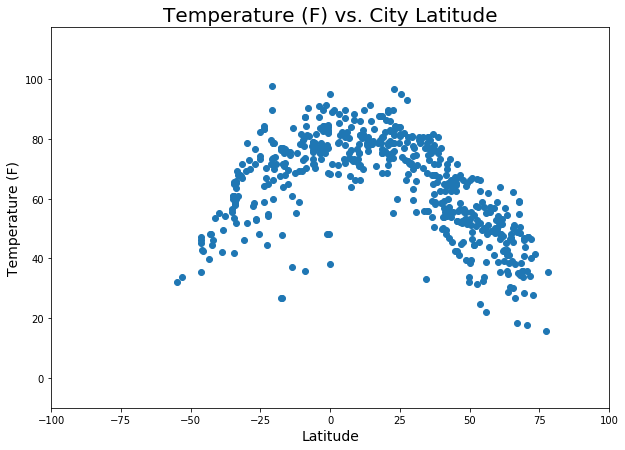

In [192]:
def scatter_plot(x,y,info):
    plt.figure(figsize=(10,7))
    #plt.scatter(city_dropped_df["Lat"], city_dropped_df["Temperature"])
    plt.scatter(x, y)
    plt.title(info[0], fontsize=20)
    plt.ylabel(info[1], fontsize=14)
    plt.xlabel(info[2], fontsize=14)
    plt.ylim(-10, 1.2*max(y))
    plt.xlim(-100, 100)
    pic_name = ''.join(list(info[1])[0:4])+"_vs_Lat.png"
    print(pic_name)
    plt.savefig(pic_name)
    plt.show()
temp = ["Temperature (F) vs. City Latitude","Temperature (F)","Latitude"]
scatter_plot(city_dropped_df["Lat"],city_dropped_df["Temperature"],temp)

Humi_vs_Lat.png


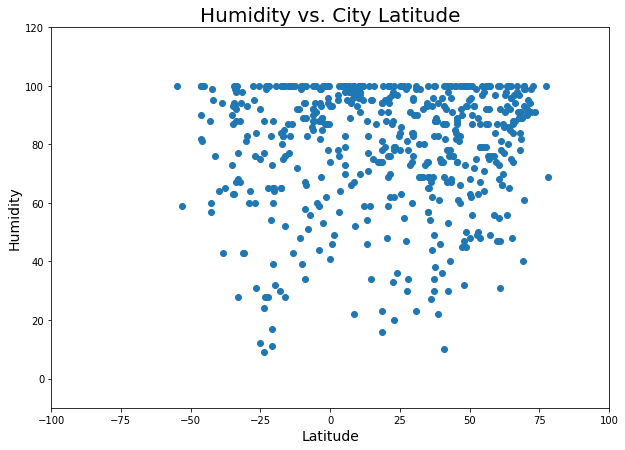

In [193]:
humid = ["Humidity vs. City Latitude","Humidity","Latitude"]
scatter_plot(city_dropped_df["Lat"],city_dropped_df["Humidity"],humid)

Clou_vs_Lat.png


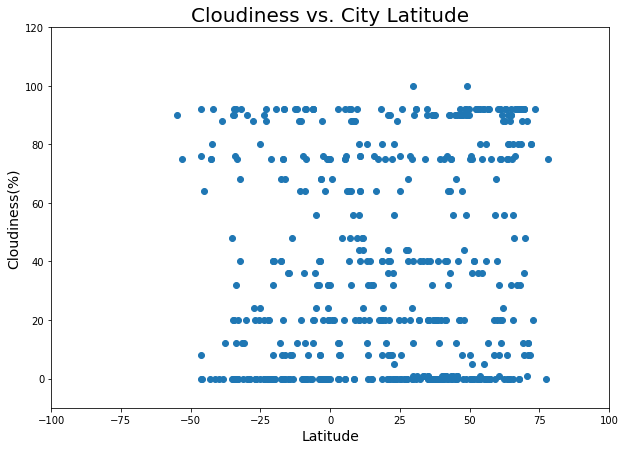

In [194]:
cloud = ["Cloudiness vs. City Latitude","Cloudiness(%)","Latitude"]
scatter_plot(city_dropped_df["Lat"],city_dropped_df["Cloudiness (%)"],cloud)

Wind_vs_Lat.png


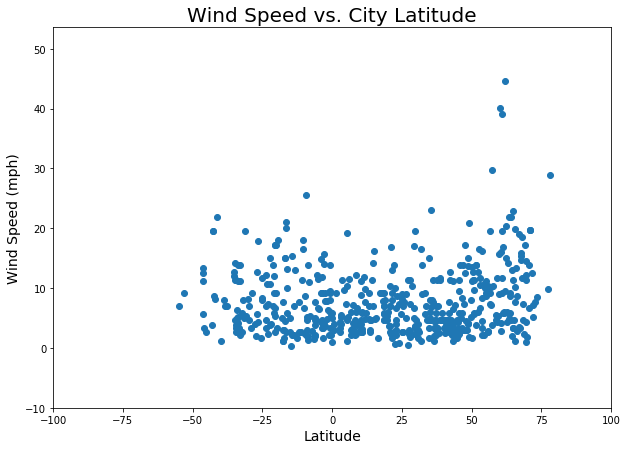

In [195]:
wind = ["Wind Speed vs. City Latitude","Wind Speed (mph)","Latitude"]
scatter_plot(city_dropped_df["Lat"],city_dropped_df["Wind Speed (mph)"],wind)

In [196]:
city_dropped_df.to_csv("WeatherPy.csv")
